In [1]:
from fastai.vision.all import *

In [2]:
path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset"
size = 224
bs = 64

In [3]:
# data = DataBlock(blocks=(ImageBlock,CategoryBlock),
#                  get_items=get_image_files,
#                  splitter=RandomSplitter(),
#                 get_y=parent_label,
#                 item_tfms=RandomResizedCrop(224,min_scale=0.3),
#                 batch_tfms=aug_transforms())

data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [4]:
dls = data.dataloaders(path,bs=64)

(#4) ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

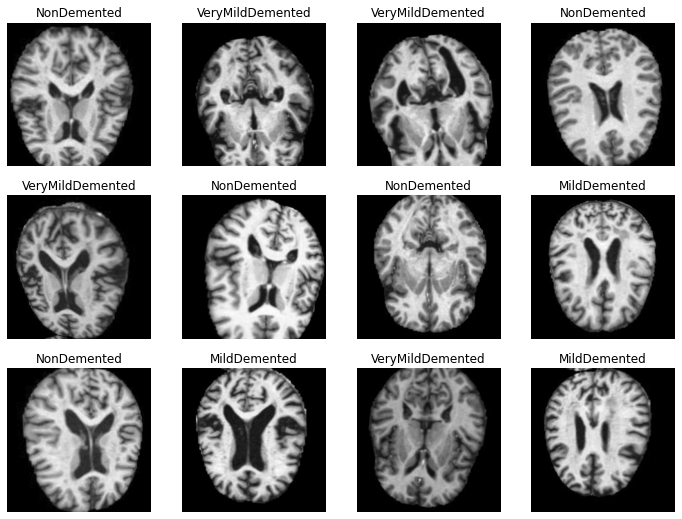

In [5]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [6]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.855829,1.184427,0.567187,00:29


epoch,train_loss,valid_loss,accuracy,time
0,1.212052,0.879047,0.639063,00:33
1,1.038038,0.911902,0.658594,00:32
2,0.848825,0.719069,0.707031,00:32
3,0.637757,0.538735,0.784375,00:32
4,0.494197,0.626291,0.753125,00:32
5,0.369747,0.486031,0.800781,00:32
6,0.258696,0.298099,0.883594,00:32
7,0.190063,0.254004,0.903906,00:32
8,0.144941,0.241758,0.906250,00:33
9,0.120865,0.229594,0.913281,00:32


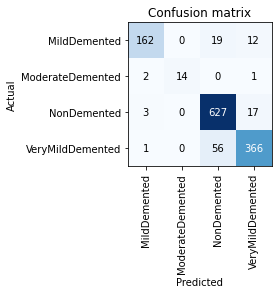

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

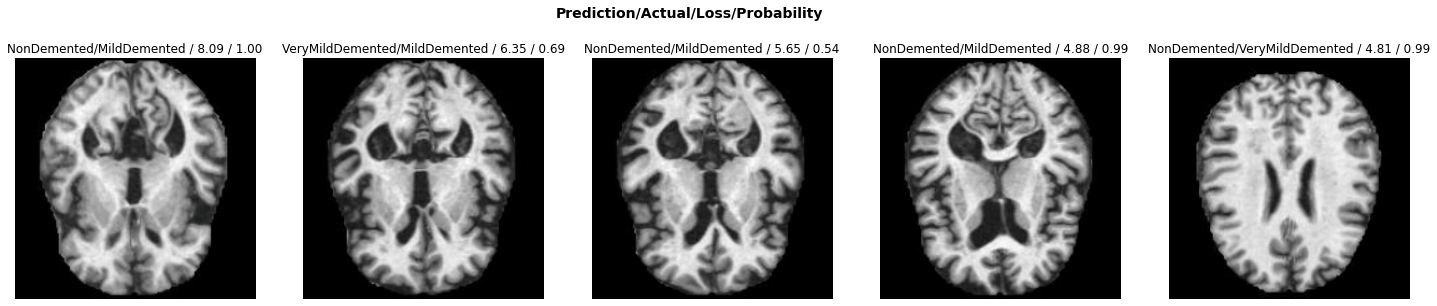

In [8]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [9]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [10]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [11]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [12]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])

In [14]:
learn.predict("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27.jpg")

('ModerateDemented',
 tensor(1),
 tensor([2.7022e-04, 9.9914e-01, 9.3900e-06, 5.7723e-04]))